# Visualizing Growth Using World Bank Development Indicators

Sean McSkeane, Albert Chu, Sonny Liu

![World Bank Logo](images/worldBank.png "World Bank")

### Table of Contents

- Background
    - Introduction
    - Defintions
- Data Collection
    - Libraries
    - Data
- Data Processing
    - Creation of Prediction Data
    - Creation of Miscellaneous
- Exploratory Analysis and Data Visualization
    - Prediction Data Summary and Plots
    - Miscellaneous Data Summary and Plots
    - GDP Growth Map
- Analysis, Hypothesis Testing, and Machine Learning
    - Prediction
- Insight and Policy Design
    - Conclusion

## <center>Background<center>

### 1.0 Introduction

Economists are constantly making predictions about world economies with economic models and forecasts. In this analysis, we attempt to correlate the percentage growth of GDP per capita for nations using data provided by the World Bank. The World Bank is an international financial institution based in Washington D.C. that provides loans and grants to the governments of poorer countries for the purpose of pursuing capital projects. One of the major goals of the World Bank is to end extreme poverty in developing nations.

We use data provided from the [World Bank's World Development Indicators](https://databank.worldbank.org/source/world-development-indicators) to create our own custom comma-separated values (CSV) file for our own data analysis. According to the World Bank's website, "World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates." 

In our analysis we attempt to predict the growth of nations by cleaning and reorganizing, plotting important economic factors across time, correlating other factors with gdp per capita, and using machine learning to predict future growth.

### 1.1 Definitions

Here are definitions of the datapoints we use directly taken from the [World Bank.](https://databank.worldbank.org/metadataglossary/world-development-indicators/series)

GDP:
> GDP stands for gross domestic product. It is used to measure the market value of all the final goods and services produced in a specific time period.

Per Capita:
> Per capita simply is an economic term that means per person in a specefied area.

Final Consumption Expenditure:
> Final consumption expenditure (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption). This estimate includes any statistical discrepancy in the use of resources relative to the supply of resources.

General government final consumption expenditure (current US$):
> General government final consumption expenditure (formerly general government consumption) includes all government current expenditures for purchases of goods and services (including compensation of employees). It also includes most expenditures on national defense and security, but excludes government military expenditures that are part of government capital formation. Data are in current U.S. dollars.

Foreign direct investment, net inflows (BoP, current US$):
> Foreign direct investment refers to direct investment equity flows in the reporting economy. It is the sum of equity capital, reinvestment of earnings, and other capital. Direct investment is a category of cross-border investment associated with a resident in one economy having control or a significant degree of influence on the management of an enterprise that is resident in another economy. Ownership of 10 percent or more of the ordinary shares of voting stock is the criterion for determining the existence of a direct investment relationship. Data are in current U.S. dollars.

Exports of goods and services (current US$):
> Exports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from residents to nonresidents of general merchandise, net exports of goods under merchanting, nonmonetary gold, and services. Data are in current U.S. dollars.

Imports of goods and services (current US$):
> Imports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from nonresidents to residents of general merchandise, nonmonetary gold, and services. Data are in current U.S. dollars.

### 1.2 Libraries

The following python libraries used are listed below along with their official descriptions:

* pandas - an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language ([docs](https://pandas.pydata.org/))
* numpy - NumPy is the fundamental package for scientific computing with Python ([docs](https://numpy.org/))
* matplotlib - Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms ([docs](https://matplotlib.org/))
* seaborn - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics ([docs](https://seaborn.pydata.org/))
* sklearn - Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities ([docs](https://scikit-learn.org/stable/))
* statsmodels - is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration ([docs](https://www.statsmodels.org/stable/index.html))
* folium - makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. ([docs](https://python-visualization.github.io/folium/))


In [25]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from statsmodels import api as sm
import folium
import json

### 1.3 Context
According to [investopedia](https://www.investopedia.com/terms/e/economic-forecasting.asp), "Economic forecasting is the process of attempting to predict the future condition of the economy using a combination of important and widely followed indicators. Economic forecasting involves the building of statistical models with inputs of several key variables, or indicators, typically in an attempt to come up with a future gross domestic product (GDP) growth rate. Primary economic indicators include inflation, interest rates, industrial production, consumer confidence, worker productivity, retail sales, and unemployment rates."

Economic predicitons are incredibly important for buisnesses and governments world wide. They want to manage their finances accoridingly so that they can encourage growth and mitigate losses. However, many descriped economic forecasting as unreliable. Investopedia goes on to even state that "Economic forecasting is often described as a flawed science." According to [Bloomberg Buisness](https://www.bloomberg.com/news/articles/2019-03-28/economists-are-actually-terrible-at-forecasting-recessions), "A recent working [paper](https://www.imf.org/en/Publications/WP/Issues/2018/03/05/How-Well-Do-Economists-Forecast-Recessions-45672) by Zidong An, Joao Tovar Jalles, and Prakash Loungani discovered that of 153 recessions in 63 countries from 1992 to 2014, only five were predicted by a consensus of private-sector economists in April of the preceding year." This shows that economies are far too complex for even large agencies to forecast accurately, and that economic models are often misleading.

![Missed Predictions](images/misses.png "Bloomberg Data")
source from [Bloomberg Buisness](https://www.bloomberg.com/news/articles/2019-03-28/economists-are-actually-terrible-at-forecasting-recessions)

In this project, we attempt to correlate GDP growth with several important key data points and even attempt to make our own prediction model. Why are we pursuing this fruitless objective when the world's best economists cannot make an accurate model? Mainly to get an intuition at the challenges economists face and also to see how far data science and programming can help amatuers like ourselves tackle the seemingly impossible.  

## <center>Data Processing<center>

### 2.0  Data Collection
The formula for calculating GDP is:

    GDP = Consumption + Investment + Government Spending + Net Exports

therefore we concluded it would be best if we split the CSV into two dataframes which included GDP calculators and another dataframe from more miscellenous data.

We searched through the World Bank Development Indicators in order to find datapoints that matched the formula as close as possible. We also chose datapoints that we found interesting and/or could possibly have a correlation with GDP per capita and GDP growth. Our datset is availble [here](https://github.com/thechuster/thechuster.github.io/blob/albert/WorldBankData/data.csv) at the project's github page.

In [3]:
worldBankDevInc = pd.read_csv("WorldBankData/data.csv")

worldBankDevInc.dropna(inplace=True)
countryName = ""
first = True
newRows = []
countriesData = []

for index, row in worldBankDevInc.iterrows():
    if (countryName != row["Country Name"]):
        if (first == False):
            #CHOSE WHAT YEARS TO DROP HERE
#             df = df.drop(df.loc[:, '1960 [YR1960]':'1999 [YR1999]'].columns, axis = 1)  
            countriesData.append(df)
            # IF YOU WANT TO SEE ALL COUNTRIES DATA UNCOMMENT THIS
            #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
                #display(df)
        countryName = row["Country Name"]
        df = pd.DataFrame(columns=worldBankDevInc.columns) 
        first = False
        
    df = df.append(row, ignore_index=True)

worldData = pd.concat(countriesData)
# df  = df.drop(df.loc[:, '1960 [YR1960]':'1999 [YR1999]'].columns, axis = 1) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    display(countriesData[206])

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,World,WLD,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,89.7470779418945,..,89.8867263793945,89.73896,89.76079,90.09036,90.28756,90.44798,90.30999,90.5136,90.48209,90.45493,..
1,World,WLD,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,3.82455669177821,5.53180688564998,6.29191447750782,-1.36409149911428,0.775066291042961,4.87383091854163,3.75054299401589,4.63630589579466,1.79554937138471,0.517066830716701,1.86491290260848,0.805927335815127,3.56140417297873,5.97931692584852,5.20987950069849,3.43433144008054,2.74956267290972,2.54309818952851,3.61798510751402,3.00650855197931,1.46301808779616,2.4680809839501,1.71835487641421,3.74858458862741,3.29835475775853,2.21669252517704,3.62068678447997,1.55599024690241,2.79115821485058,3.44953652132376,1.87066384914678,3.61999537345889,1.57430765382489,5.52540304277476,3.41670430543519,4.79799348316917,5.13918913741134,-0.108027864217718,-1.0217153334587,4.82408306126788,2.91431395916423,3.08983534636607,2.27578094371812,3.01262664499615,3.13334710859108,2.35749617104845,3.00433197520826,..,..
2,World,WLD,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
3,World,WLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,8.56202153951592,8.9627248859483,9.30874245225373,9.458788244142,9.34750634702223,9.29471275406602,9.20008442422269,9.04112199123932,9.06090065244793,9.82514331356262,9.56935837112177,9.45270493564931,9.46374185948091,9.50753125576719,9.59698254405745,9.88628070186998,10.0231959648361,..,..,..
4,World,WLD,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,43.8002650137584,43.6365914248492,42.8938027932221,42.2060851083481,41.3664043310787,40.6965624449873,40.2624711329534,40.2381994624912,40.1991446935927,40.0648979418348,39.7327187451559,39.508811405597,39.0601063609179,38.0021749104642,37.1021712566213,35.9629867428729,35.0148042564423,34.42401720717,33.8572454843509,33.1967643212232,32.2266382221097,31.2779769403582,30.5013693112494,29.7013114430674,29.1733692090603,28.8098172705724,28.4093104076149,28.2649635947778,28.1411866629902
5,World,WLD,Employment in industry (% of total employment)...,SL.IND.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,21.6516925324977,21.527138324844,21.6117847103248,21.6964127337876,21.823627158468,21.8885375999451,21.787656173132,21.4629106755983,21.3136240854945,21.2086816957152,21.1149087439687,20.9815466985686,21.0058224818388,21.3241094091881,21.6263803354217,21.9834910554221,22.2665665618542,22.

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,United States,USA,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,81.6253967285156,..,..,..,..,..,..,..,..,..,..,93.3478088378906,95.2786483764648,..,..,98.8609085083008,98.8573913574219,..,96.9185333251953,96.2886962890625,97.2522201538086,96.1293869018555,..,..,..,97.71185,98.42669,97.36396,97.74179,98.06465,99.43481,99.30372,99.77238,99.62092,98.33983,97.63436,96.38975,97.26517,97.50924,97.97434,98.19414,99.64003,95.55776,..,..
1,United States,USA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,2.82072687989353,4.78293619252381,6.12444910299685,-4.41221612408582,-0.45080218246153,4.64086184304826,4.40860025267118,5.23352339631104,-0.760885569357512,-2.43005547342601,4.3242158204319,0.870203901637282,3.40326296506279,8.10674351658398,4.25066537828623,3.5814530772634,3.75845398650638,5.82824503108708,2.21138114914001,1.21768386051795,0.449947887381057,3.48067522642867,2.32026276379192,4.54252119324556,3.27148288766921,4.44954155767037,5.40268531470242,5.94581897679211,4.16749984921016,3.59713179891652,1.92304440239846,1.36977173138115,2.40007651531626,3.7122434677844,2.5171568336751,3.54982788692119,0.520708736578129,-2.42292639916755,-1.29630962630627,3.19978278462472,2.28606067023425,4.27359272268313,1.28811495974573,3.61811766052482,3.1843378764558,0.565980705380852,2.83426174365306,..,..
2,United States,USA,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,937510234909.97,1015409860355.56,1113237940032.86,1252476213205.58,1315564678836.84,1416531842515.86,1572330818506.82,1757061954579.54,1988493330853.55,2148972586425.86,2302714526273.35,2632733298444.46,2787751420783.85,2988711181122.32,3370698430676.17,3613579716247.4,3816375213867.74,4072933970058.58,4458697559759.45,4737937779807.58,4978802874389.38,5148953031205.18,5455783087975.63,5712110818966.12,6105794399121.82,6442201380022.6,6853506178065.24,7339074352162.23,7834962618624.28,8293245975623.27,8812709777888.21,9139188106939.03,9394461176709.74,9816428787969.95,10478036952207,11117320814516.6,11872790551256.1,12251856447577.3,12295805003953.1,12086574023079,12655135542015.3,13258084627100.6,14068520607491.8,14454861303519.9,15230832051674.8,15772023624639.7,15985139599881,16740180419866.7,..,..
3,United States,USA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,12.5020673,13.16894835,13.95448455,14.45482881,14.53652482,14.54146429,14.65803467,14.89823642,15.29436988,16.34297083,16.41288147,16.36738026,16.36637753,16.33083781,16.50510561,16.81565916,17.07341533,..,..,..
4,United States,USA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,2.77699995040894,2.74000000953674,2.58999991416931,2.76999998092651,2.75399994850159,2.71700000762939,2.62299990653992,2.56900000572205,2.45799994468689,1.61800003051758,1.513

Above are two raw dataframes of the data from the the CSV file obtained from the world bank. One of them shows world statistics and the other shows statistics from the United States. The list ```contriesData``` in our code simply contains a dataframe for each country or region that the World Bank provides. If you wish to see a certain country you can change the index of ```display(CountriesData[n])``` to be whatever country you wish to see.

### 2.1 Creation of GDP Data

The predictionData dataframe consists of variables that are known to calculate GDP. The dataframe was built using the worldData dataframe and consists of columns for country, year, GDP per capita (current US), GDP per capita growth (annual percentage), final consumption expenditure (percentage of GDP), final consumption expenditure (current US), general government final consumption expenditure (current US), general government final consumption expenditure (percentage of GDP), foreign direct investment, net inflows (percentage of GDP), foreign direct investment, net inflows (BoP, current US), exports of goods and services (current US), imports of goods and services (current US), exports of goods and services (percentage of GDP), and imports of goods and services (% of GDP).

The dataframe contains one row for each combination of country and year, with the remaining values in the row corresponding to the variables listed above. However, only years from 2000 to 2015 were included to ensure minimal missing data, as years prior to 2000 were more likely to be missing data. An important factor to note that it is there was no data point calculating total investments for any nation. Therefore we used one metric of investment which was Foreign Direct Investment as an indicator of investment for a country.

In [4]:
predictionData = pd.DataFrame(columns = ["Country Name", "Year"])

countriesList = worldData["Country Name"]
for name in countriesList.unique():
        counter = 2000
        while counter <= 2015:
            predictionData = predictionData.append({"Country Name": name, "Year": counter}, ignore_index=True)
            counter += 1

predictionData["GDP per capita (current US$)"] = 0.0
predictionData["GDP per capita growth (annual %)"] = 0.0
predictionData["Final consumption expenditure (% of GDP)"] = 0.0
predictionData["Final consumption expenditure (current US$)"] = 0.0
predictionData["General government final consumption expenditure (current US$)"] = 0.0
predictionData["General government final consumption expenditure (% of GDP)"] = 0.0
predictionData["Foreign direct investment, net inflows (% of GDP)"] = 0.0
predictionData["Foreign direct investment, net inflows (BoP, current US$)"] = 0.0
predictionData["Exports of goods and services (current US$)"] = 0.0
predictionData["Imports of goods and services (current US$)"] = 0.0
predictionData["Exports of goods and services (% of GDP)"] = 0.0
predictionData["Imports of goods and services (% of GDP)"] = 0.0
predictionData["GDP growth (annual %)"] = 0.0

country = "Afghanistan"
countryCounter = 0
for index, row in worldData.iterrows():
    if row["Country Name"] != country:
        countryCounter += 1
        country = row["Country Name"]
    if row["Series Name"] in predictionData.columns:
        counter = 2000
        while counter <= 2015:
            yearString = str(counter) + " [YR" + str(counter) + "]"
            indx = countryCounter * 16 + (counter - 2000)
            if row[yearString] != "..":
                predictionData.at[indx, row["Series Name"]] = row[yearString]
            else:
                predictionData.at[indx, row["Series Name"]] = np.nan
            counter += 1

predictionData.drop(predictionData.index[3472:], inplace=True)    
        
predictionData.head()

,Country Name,Year,GDP per capita (current US$),GDP per capita growth (annual %),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %)
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,179.426494,NaN,132.122532,5.357802e+09,3.453616e+08,8.516561,1.232992,50000000.0,1.329281e+09,2.851980e+09,32.779841,70.329362,NaN
3,Afghanistan,2003,190.684009,3.868362,147.518576,6.661295e+09,4.482138e+08,9.925977,1.280017,57800000.0,2.003508e+09,3.250916e+09,44.368948,71.993593,8.832278
4,Afghanistan,2004,211.381970,-2.875184,139.652624,7.299329e+09,5.587055e+08,10.689296,3.575819,186900000.0,1.616202e+09,3.170767e+09,30.921587,60.663923,1.414118


### 2.2 Creation of Miscellenous Data

The miscellaneousData dataframe consists of variables we thought would have a correlation to GDP growth. The dataframe was built using the worldData dataframe and consists of columns for country, year, GDP per capita (current US), employment in agriculture (% of total employment) (modeled ILO estimate), employment in industry (% of total employment) (modeled ILO estimate), employment in services (% of total employment) (modeled ILO estimate), current health expenditure (% of GDP), fertility rate, total (births per woman), government expenditure on education, total (% of GDP), prevalence of undernourishment (% of population), adjusted net enrollment rate, primary (% of primary school age children).

The dataframe contains one row for each combination of country and year, with the remaining values in the row corresponding to the variables listed above. However, only years from 2000 to 2015 were included to ensure minimal missing data, as years prior to 2000 were more likely to be missing data.

In [5]:
miscellaneousData = pd.DataFrame(columns = ["Country Name", "Year"])

countriesList = worldData["Country Name"]
for name in countriesList.unique():
    counter = 2000
    while counter <= 2015:
        miscellaneousData = miscellaneousData.append({"Country Name": name, "Year": counter}, ignore_index=True)
        counter += 1

miscellaneousData["GDP per capita (current US$)"] = 0.0
miscellaneousData["Employment in agriculture (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Employment in industry (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Employment in services (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Current health expenditure (% of GDP)"] = 0.0
miscellaneousData["Fertility rate, total (births per woman)"] = 0.0
miscellaneousData["Government expenditure on education, total (% of GDP)"] = 0.0
miscellaneousData["Prevalence of undernourishment (% of population)"] = 0.0
miscellaneousData["Adjusted net enrollment rate, primary (% of primary school age children)"] = 0.0

country = "Afghanistan"
countryCounter = 0
for index, row in worldData.iterrows():
    if row["Country Name"] != country:
        countryCounter += 1
        country = row["Country Name"]
    if row["Series Name"] in miscellaneousData.columns:
        counter = 2000
        while counter <= 2015:
            yearString = str(counter) + " [YR" + str(counter) + "]"
            indx = countryCounter * 16 + (counter - 2000)
            if row[yearString] != "..":
                miscellaneousData.at[indx, row["Series Name"]] = row[yearString]
            else:
                miscellaneousData.at[indx, row["Series Name"]] = np.nan
            counter += 1

miscellaneousData.drop(predictionData.index[3472:], inplace=True) 

miscellaneousData.head()

,Country Name,Year,GDP per capita (current US$),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Current health expenditure (% of GDP),"Fertility rate, total (births per woman)","Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)"
0,Afghanistan,2000,NaN,69.094002,8.007,22.899000,NaN,7.485,NaN,46.1,NaN
1,Afghanistan,2001,NaN,70.317001,7.434,22.250000,NaN,7.387,NaN,46.4,NaN
2,Afghanistan,2002,179.426494,63.477001,10.195,26.327999,9.443391,7.272,NaN,43.7,NaN
3,Afghanistan,2003,190.684009,62.699001,10.437,26.864000,8.941259,7.148,NaN,39.8,NaN
4,Afghanistan,2004,211.381970,62.534000,10.715,26.750000,9.808473,7.016,NaN,36.1,NaN


## <center>Exploratory Analysis and Data Visualization<center>

### 3.0 GDP Statistics

The following table below provides us with the statistics from the variables that are involved with calculating GDP. These only utilize the information contained in data for calculating GDP.

In [6]:
predictionData.describe()

,GDP per capita (current US$),GDP per capita growth (annual %),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
count,3270.000000,3241.000000,2755.000000,2.740000e+03,2.729000e+03,2739.000000,3027.000000,3.153000e+03,2.989000e+03,2.989000e+03,3004.000000,3004.000000
mean,13819.110697,2.388447,80.727680,2.452857e+11,5.528432e+10,16.521889,8.572102,9.019164e+09,8.444386e+10,8.265407e+10,43.255086,49.490405
std,21923.158400,5.629381,19.851309,1.021754e+12,2.085425e+11,8.029543,48.499468,3.481636e+10,2.288171e+11,2.397827e+11,31.949753,30.206760
min,111.927224,-62.378077,12.173205,1.786634e+08,3.088705e+07,0.951747,-58.322880,-2.967943e+10,7.960111e+06,1.144018e+07,0.099465,0.064705
25%,1253.937370,0.190517,71.252935,5.264093e+09,9.077000e+08,11.682325,1.256553,7.977169e+07,1.367965e+09,2.129926e+09,24.455476,30.263562
50%,4311.495421,2.322977,79.812924,1.876980e+10,3.391895e+09,15.745053,3.137152,5.552521e+08,7.503513e+09,8.350275e+09,36.430283,43.609913
75%,16949.803274,4.596447,90.965881,1.114418e+11,2.366861e+10,19.488833,6.506880,3.352997e+09,5.508020e+10,4.926399e+10,53.251363,60.658136
max,189170.895671,121.779543,241.973940,1.490724e+13,2.612706e+12,135.809438,1282.632552,7.340103e+11,2.462839e+12,2.879284e+12,433.223529,427.576471


Although this information is useful to look at when looking at the big picture, it would be more interesting to see how these variables have changed overtime. In the boxplots below we seperate each datapoint as its own boxplot and plot them by five year intervals.

### 3.1 GDP Box Plots

The box plot below shows that although the median GDP per capita has slowly been increasing, the wealthiest 50\% of nations are making significantly more progress than the poorest 50 \% of nations. According to [Investopedia](https://www.investopedia.com/updates/top-developing-countries/), "As a rule of thumb, countries with developed economies have GDP per capitas of at least \$12,000(USD), although some economists believe \\$25,000 (USD) is a more realistic measurement threshold." As shown below, most only about 25-50\% of countries are considered developed depending on what your threshold is for developed countries.

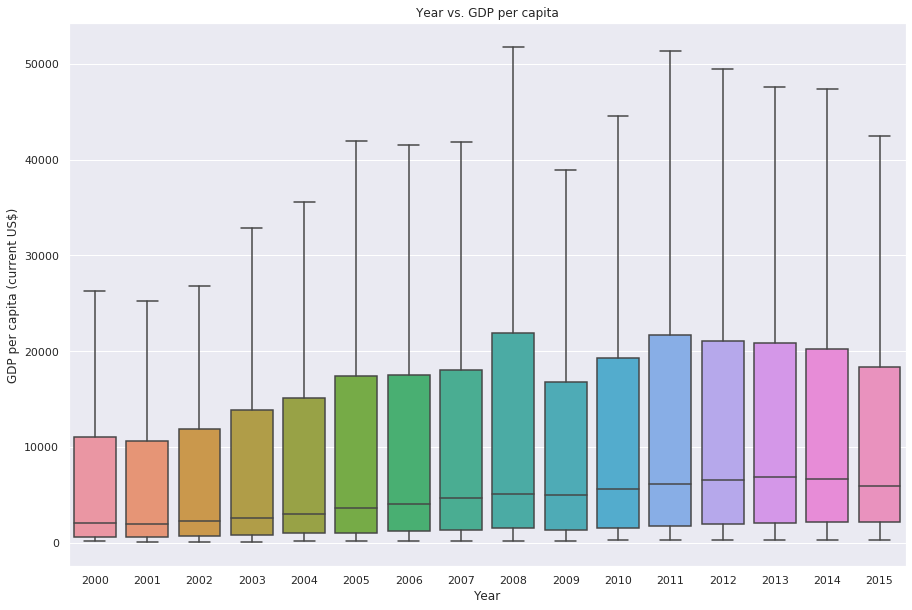

In [49]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="GDP per capita (current US$)", data=predictionData, showfliers=False).set_title("Year vs. GDP per capita")

In [63]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="GDP per capita (current US$)", data=predictionData).set_title("Year vs. GDP per capita")

The box plot below has shown how GDP and GDP per capita has grown throughout the years. As you can see there is a large drop in  2009 due to the great recession. Otherwise GDP growth has stayed very consistent in terms of growth throughout the years.

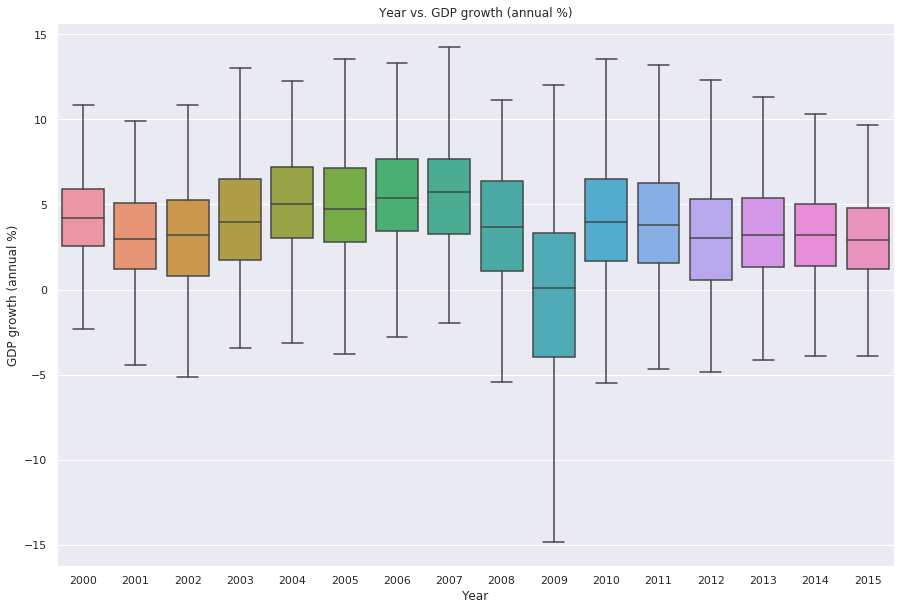

In [151]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="GDP growth (annual %)", data=predictionData, showfliers=False).set_title("Year vs. GDP growth (annual %)")

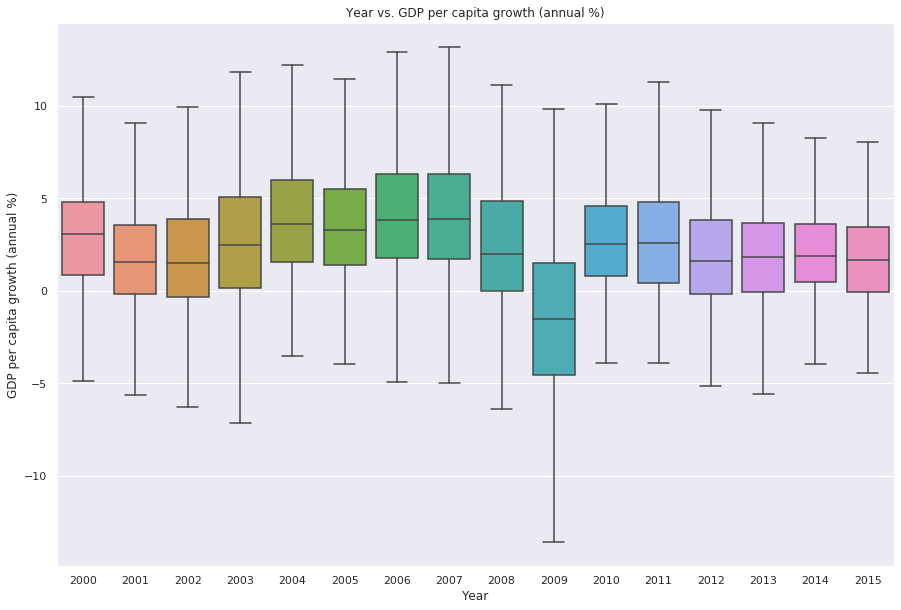

In [51]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="GDP per capita growth (annual %)", data=predictionData, showfliers=False).set_title("Year vs. GDP per capita growth (annual %)")

In [64]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="GDP per capita growth (annual %)", data=predictionData).set_title("Year vs. GDP per capita growth (annual %)")

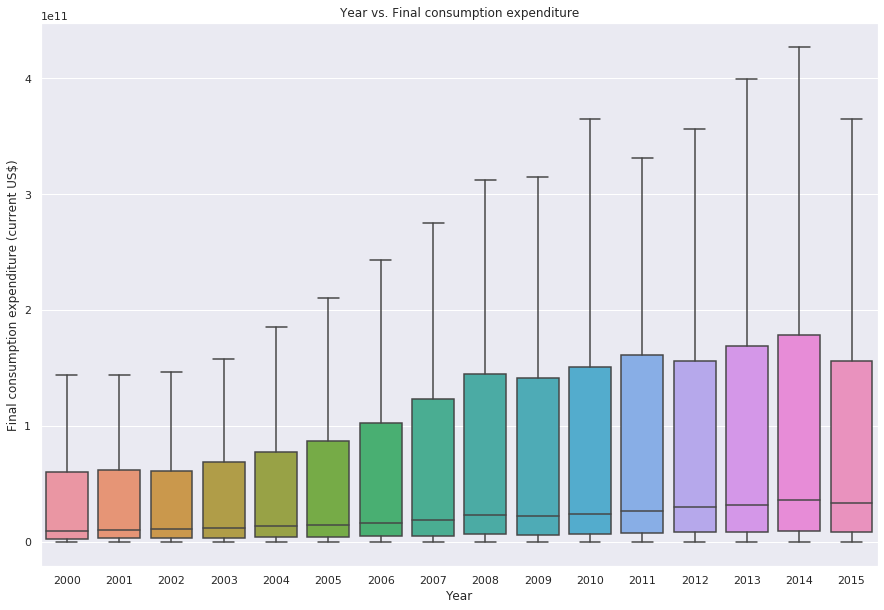

In [53]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="Final consumption expenditure (current US$)", data=predictionData, showfliers=False).set_title("Year vs. Final consumption expenditure")

In [65]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="Final consumption expenditure (current US$)", data=predictionData).set_title("Year vs. Final consumption expenditure")

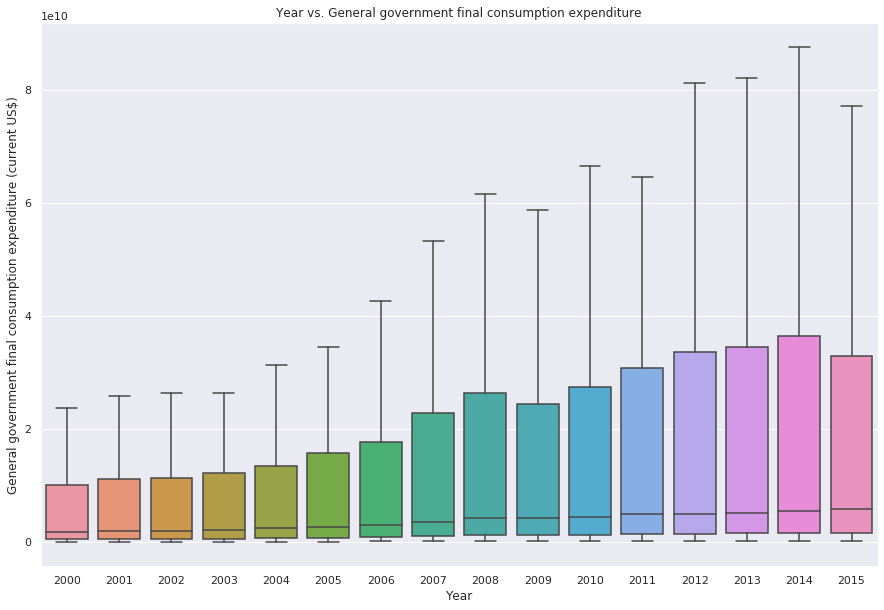

In [55]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="General government final consumption expenditure (current US$)", data=predictionData, showfliers=False).set_title("Year vs. General government final consumption expenditure")

In [66]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="General government final consumption expenditure (current US$)", data=predictionData).set_title("Year vs. General government final consumption expenditure")

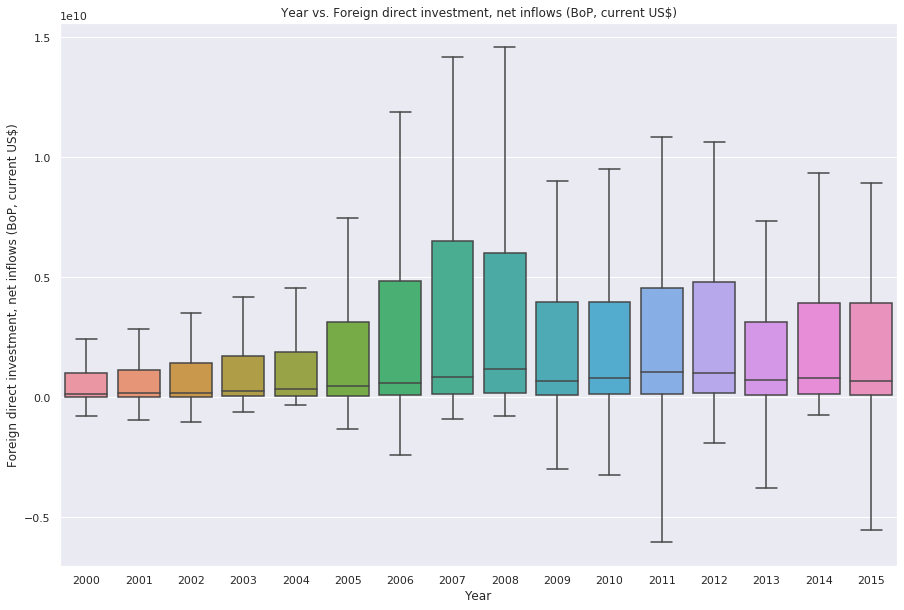

In [57]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="Foreign direct investment, net inflows (BoP, current US$)", data=predictionData, showfliers=False).set_title("Year vs. Foreign direct investment, net inflows (BoP, current US$)")

In [67]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="Foreign direct investment, net inflows (BoP, current US$)", data=predictionData).set_title("Year vs. Foreign direct investment, net inflows (BoP, current US$)")

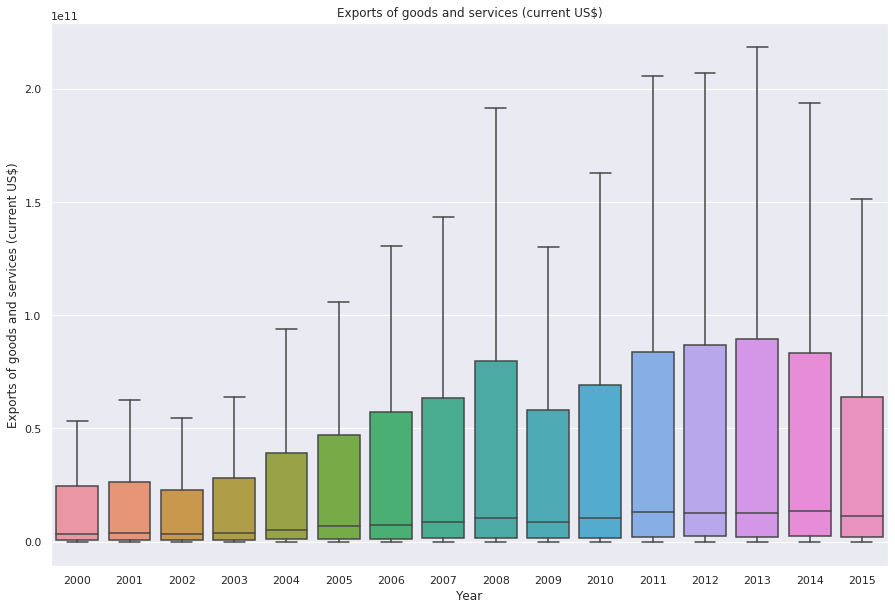

In [59]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="Exports of goods and services (current US$)", data=predictionData, showfliers=False).set_title("Exports of goods and services (current US$)")

In [68]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="Exports of goods and services (current US$)", data=predictionData).set_title("Exports of goods and services (current US$)")

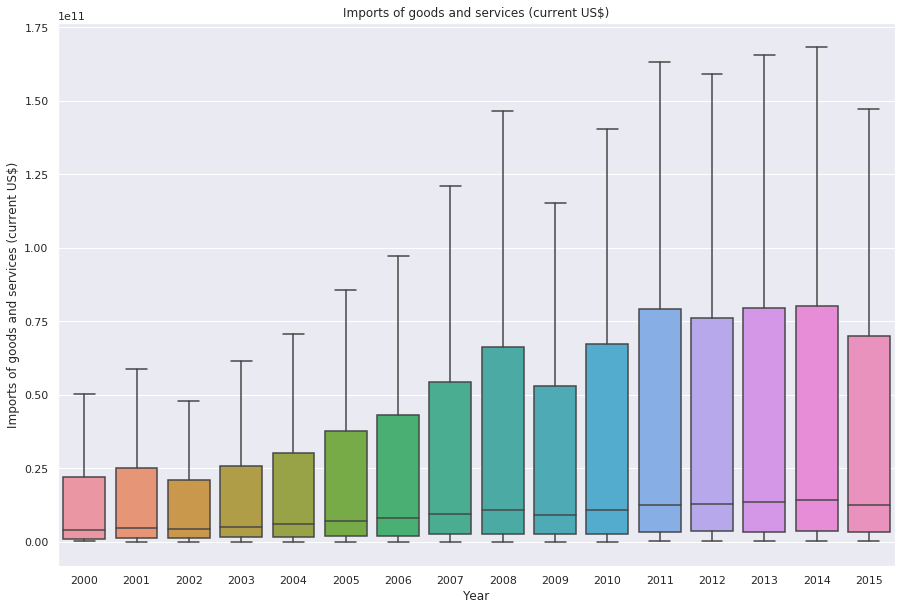

In [144]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(x="Year", y="Imports of goods and services (current US$)", data=predictionData, showfliers=False).set_title("Imports of goods and services (current US$)")

### 3.2 Observations
From the box plots we are able to observe that although every economy is improving in every single category, the countries in the top 50 \% are improving at a much greater rate than the other countries in the bottom 50\%. However this can also be attributed to the fact that countries with lower GDPs won't grow as quickly quantitativly because they start out off with lower economical stock. If we plot out the GDP growth by annual percentage for nations that are high income and nations from the least developed countries, we'll see that the nations from the least developed countries are growing at a faster rate. In fact according to the [Nasdq](https://www.nasdaq.com/articles/the-5-fastest-growing-economies-in-the-world-2019-06-27), the five fastest growing nations are all in developing countries.

In [233]:
richvsPoor = pd.DataFrame(columns = ["Country Name", "Year"])

countriesList = worldData["Country Name"]
for name in countriesList.unique():
    counter = 2000
    while counter <= 2015:
        richvsPoor = richvsPoor.append({"Country Name": name, "Year": counter}, ignore_index=True)
        counter += 1

richvsPoor["GDP growth (annual %)"] = 0.0

country = "Afghanistan"
countryCounter = 0
for index, row in worldData.iterrows():
    if row["Country Name"] != country:
        countryCounter += 1
        country = row["Country Name"]
    if row["Series Name"] in richvsPoor.columns:
        counter = 2000
        while counter <= 2015:
            yearString = str(counter) + " [YR" + str(counter) + "]"
            indx = countryCounter * 16 + (counter - 2000)
            if row[yearString] != "..":
                richvsPoor.at[indx, row["Series Name"]] = row[yearString]
            else:
                richvsPoor.at[indx, row["Series Name"]] = np.nan
            counter += 1

graphData = pd.DataFrame(columns=richvsPoor.columns) 
graphData2 = pd.DataFrame(columns=richvsPoor.columns) 
richvsPoor.drop(richvsPoor.index[:3696], inplace=True)
for index, row in richvsPoor.iterrows():
    if row["Country Name"] == "Least developed countries: UN classification":
        graphData = graphData.append(row, ignore_index=True)
    elif row["Country Name"] == "High income":
        graphData2 = graphData2.append(row, ignore_index=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(graphData)
#     display(graphData2)

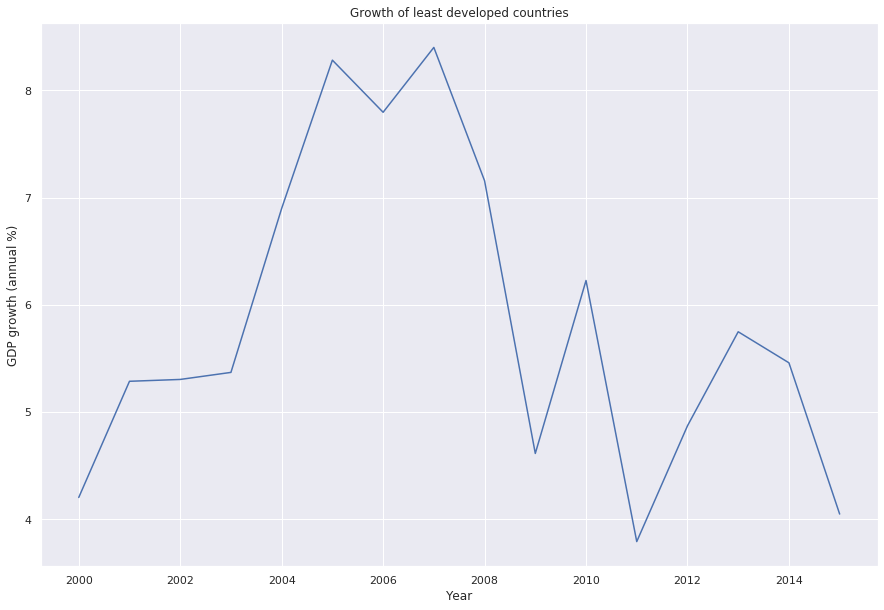

In [232]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.lineplot(x="Year", y="GDP growth (annual %)", data=graphData).set_title("Growth of least developed countries")

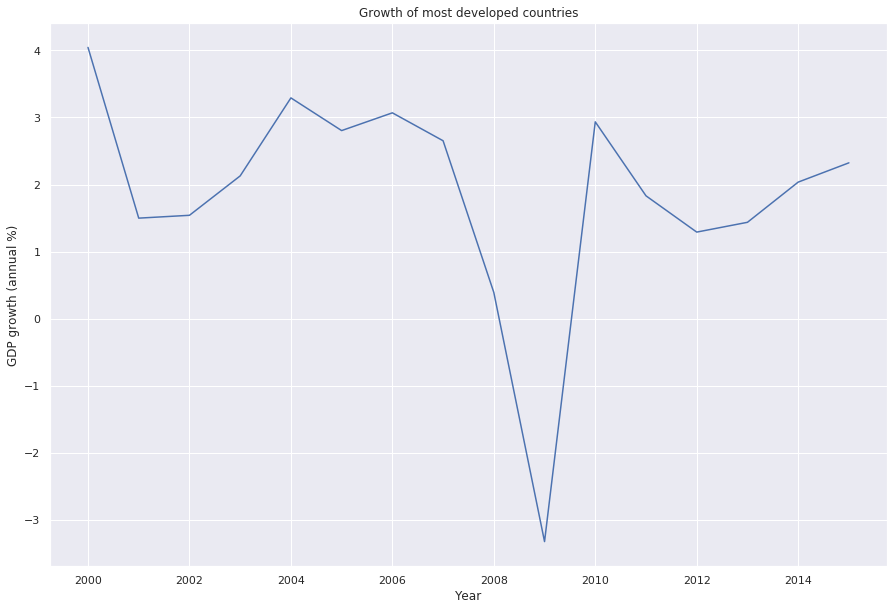

In [231]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.lineplot(x="Year", y="GDP growth (annual %)", data=graphData2).set_title("Growth of most developed countries")

In [69]:
# sns.set(rc={'figure.figsize':(15,10)})
# scatter = sns.scatterplot(x="Year", y="Imports of goods and services (current US$)", data=predictionData).set_title("Exports of goods and services (current US$)")

### 4.0 Miscellaneous Joint Plots

In [16]:
miscellaneousData.describe()

,GDP per capita (current US$),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Current health expenditure (% of GDP),"Fertility rate, total (births per woman)","Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)"
count,3990.000000,3712.000000,3712.000000,3712.000000,3704.000000,3937.000000,1871.000000,3324.000000,2424.000000
mean,12840.332986,30.099654,19.810493,50.089872,6.171237,2.978158,4.503243,12.784069,89.892001
std,20578.005360,23.758027,7.912705,18.568244,2.789795,1.517292,1.816796,11.509354,12.185349
min,111.927224,0.180000,2.051000,5.377000,1.024978,0.860000,0.787440,2.500000,26.895430
25%,1272.155890,7.963750,14.136000,35.154501,4.346333,1.800000,3.216830,3.000000,87.166593
50%,4152.963263,25.051000,20.727506,51.589001,5.509363,2.482996,4.363220,9.000000,94.810600
75%,15141.364903,48.155857,25.010750,65.353114,7.719829,4.007000,5.490590,18.755584,97.795216
max,189170.895671,92.547997,59.576000,87.990997,27.417822,7.679000,18.161070,71.500000,100.000000


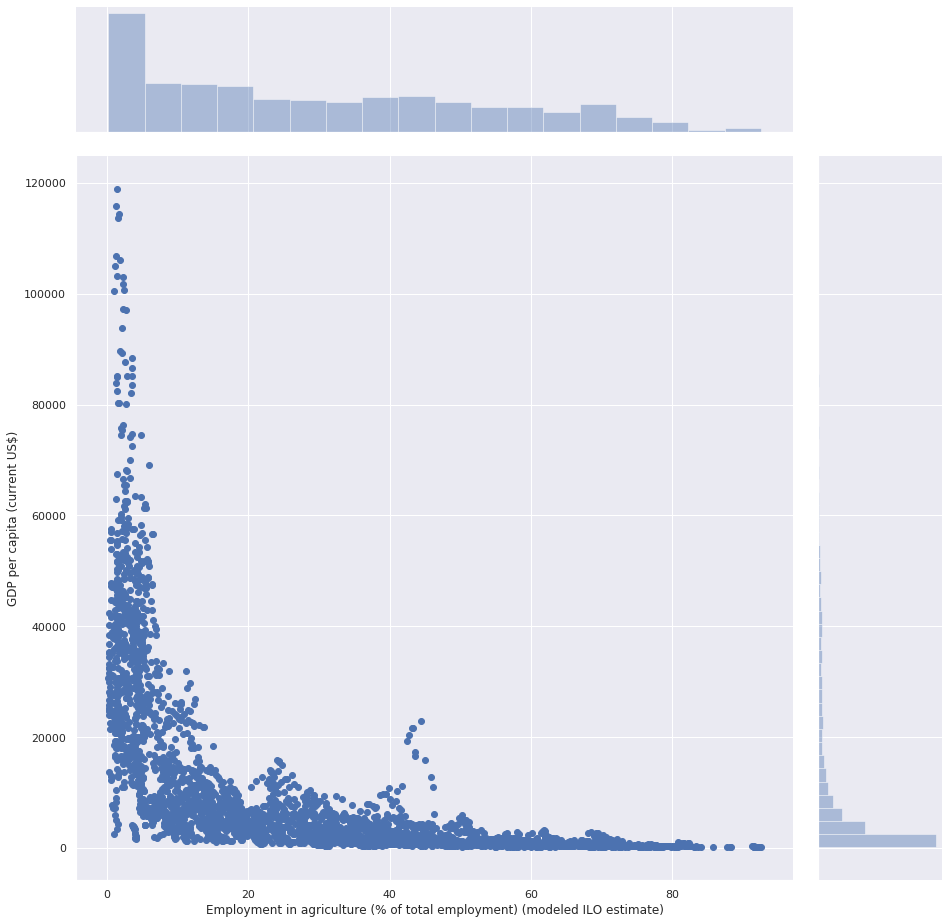

In [135]:
sns.set(rc={'figure.figsize':(15,10)})
# reg = sns.regplot(x="Employment in agriculture (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData, line_kws={"color": "red"}, order=4, ci=30, scatter_kws={"s": 80})
joint = sns.jointplot(x="Employment in agriculture (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

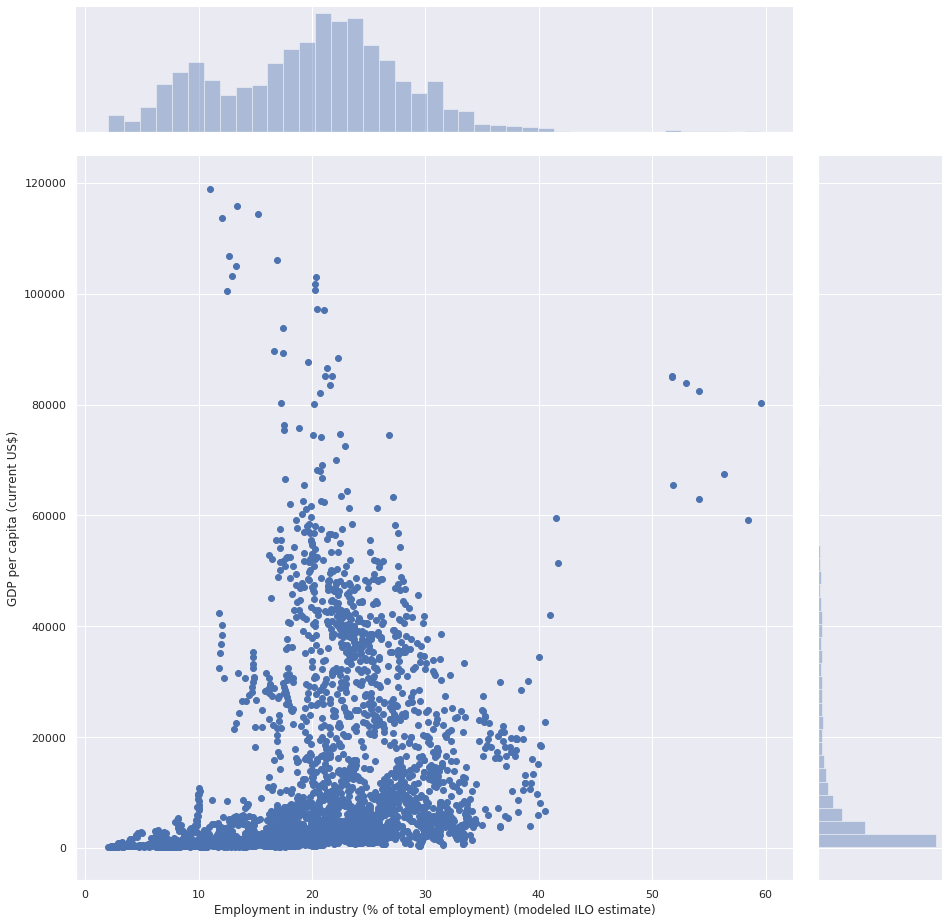

In [138]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Employment in industry (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

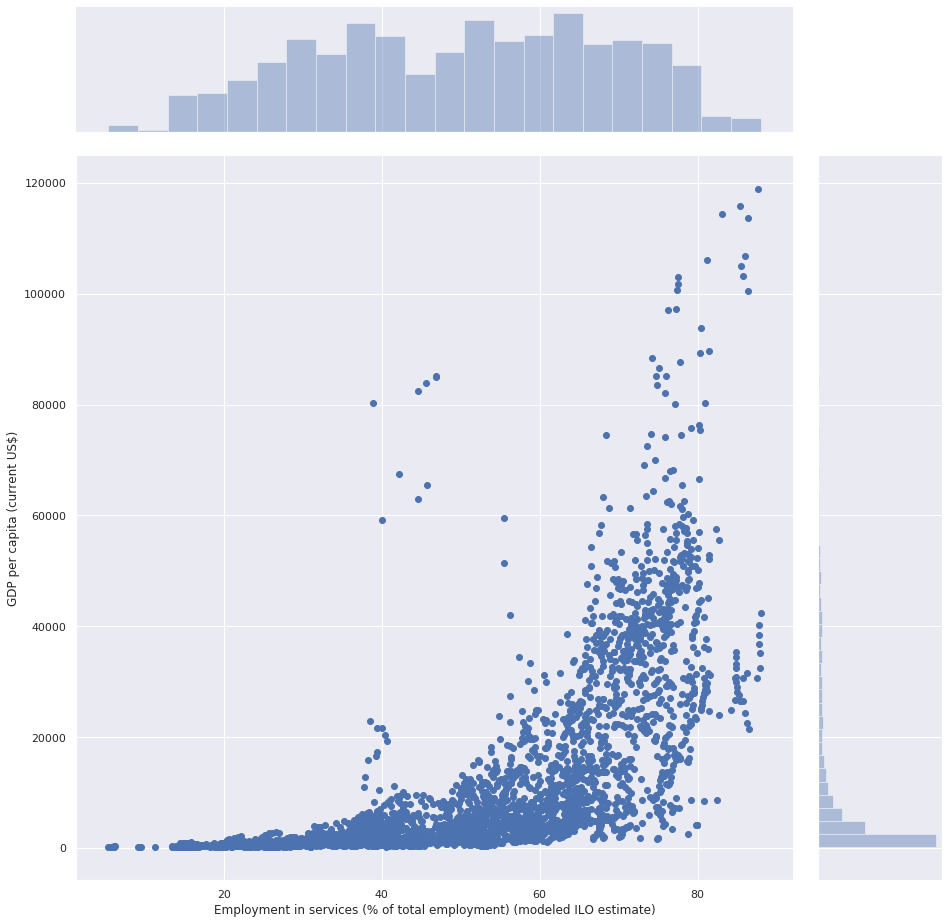

In [139]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Employment in services (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

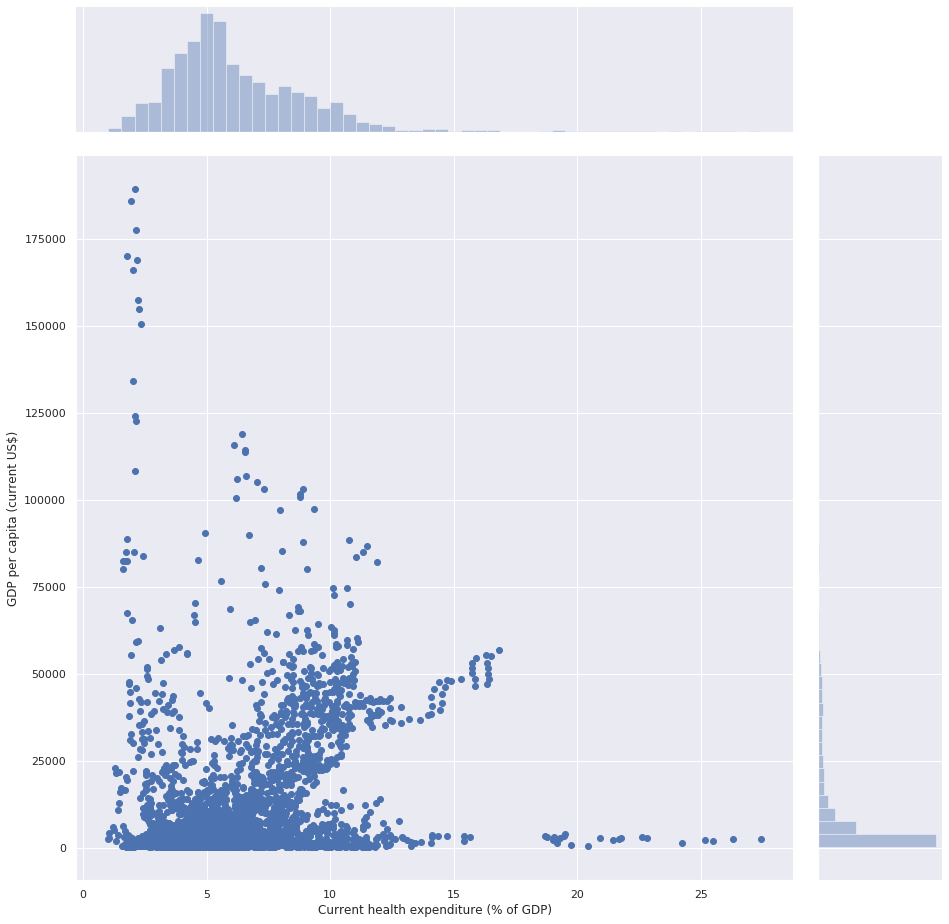

In [140]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Current health expenditure (% of GDP)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

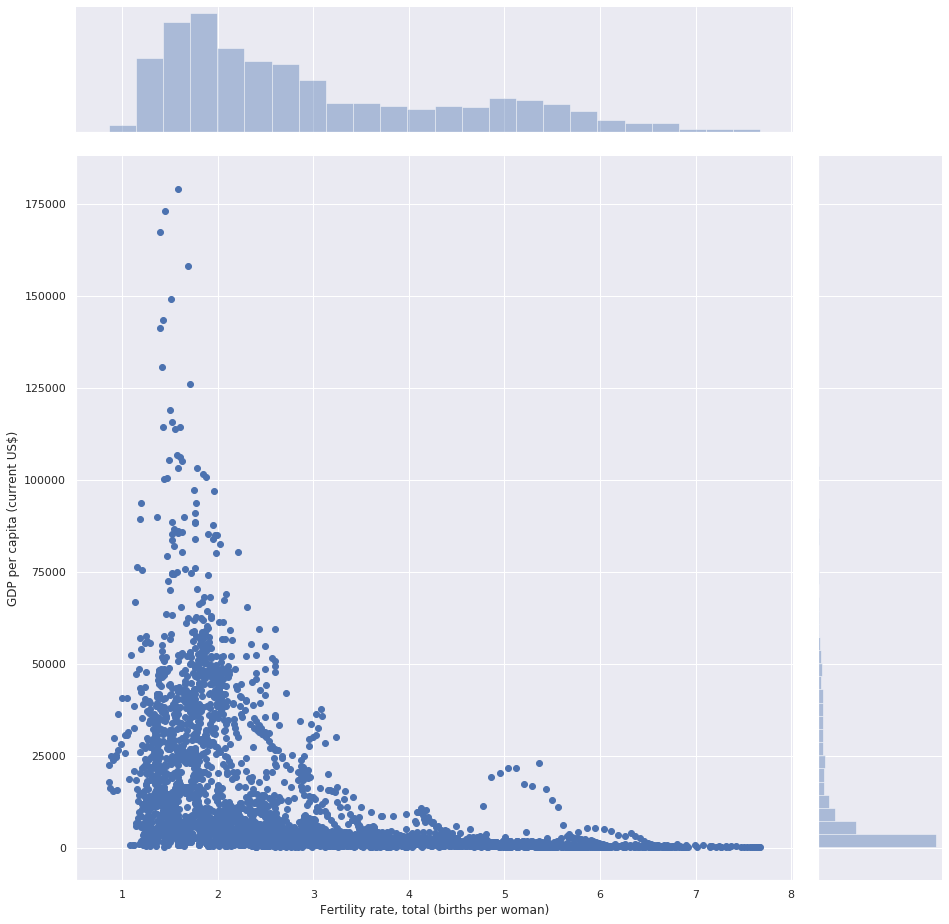

In [141]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Fertility rate, total (births per woman)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

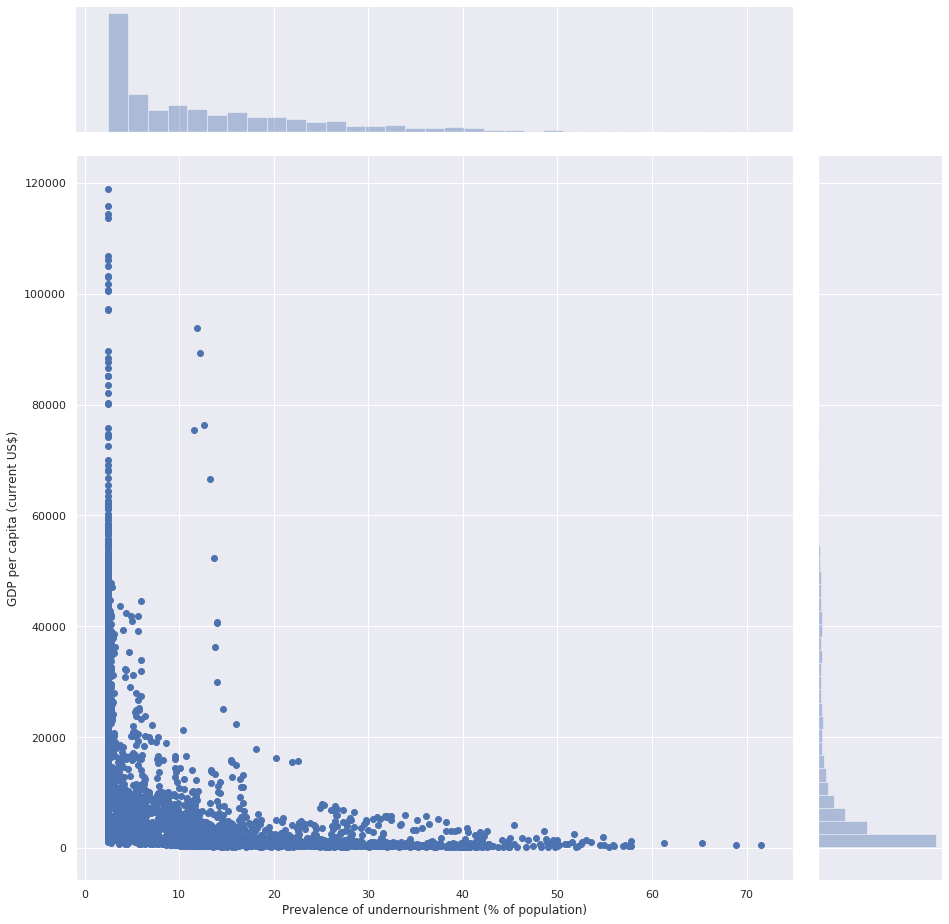

In [142]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Prevalence of undernourishment (% of population)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

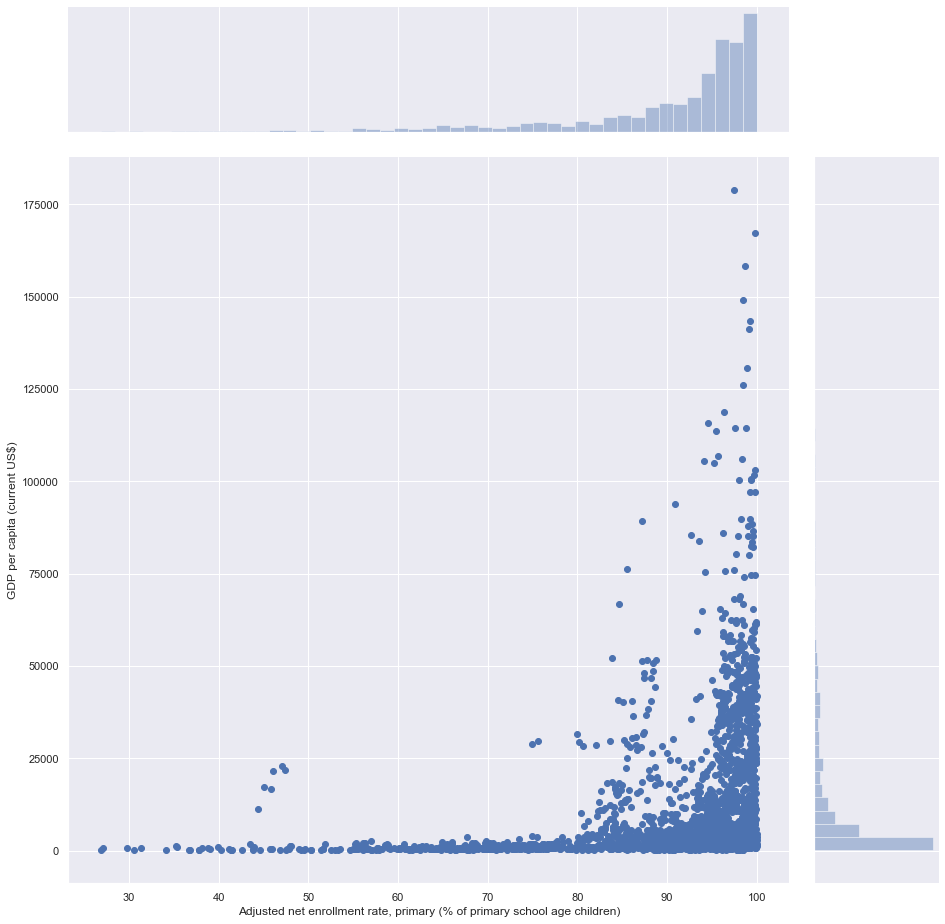

In [87]:
sns.set(rc={'figure.figsize':(15,10)})
joint = sns.jointplot(x="Adjusted net enrollment rate, primary (% of primary school age children)", y="GDP per capita (current US$)", data=miscellaneousData, height = 13)

### 4.1 Observations
TBD

### GDP Growth Map (Not Done)

In [69]:
mapPredictors = predictionData

for index, row in mapPredictors.iterrows():
    if row["Year"] != 2015:
        mapPredictors.drop([index], axis=0, inplace=True)

In [85]:
map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data="world-countries.json",
    name='choropleth',
    data=mapPredictors,
    columns=['Country Name', 'GDP per capita (current US$)'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP per capita (current US$) in 2015'
).add_to(map)

folium.LayerControl().add_to(map)

map

## <center>Analysis, Hypothesis Testing, and Machine Learning<center>

For the analysis, hypothesis testing, and machine learning part of this tutorial, we will be performing linear regression to model our data and thus better observe how different factors influence GDP.

To do so, we must organize the data used for the box plots (predictionData) from earlier since we will be first do linear regressions on GDP per capita, final consumption expenditure, general government final consumption expenditure, foreign direct investment, exports and imports of goods and services. We do this by copying predictionData into a separate dataframe, dropping irrelevant columns including CountryName, and grouping the data by year such that we get the mean for GDP per capita, final consumption expenditure, general government final consumption expenditure, foreign direct investment, exports and imports of goods and services for each year.

In [11]:
linearData = predictionData.copy()

linearData = linearData.drop(columns=['Country Name', 'GDP per capita growth (annual %)', 'Final consumption expenditure (% of GDP)', 'General government final consumption expenditure (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Exports of goods and services (% of GDP)', 'Imports of goods and services (% of GDP)' , 'GDP growth (annual %)'])
linearData = linearData.groupby(['Year']).mean()

linearData

,GDP per capita (current US$),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),"Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$)
Year,,,,,,
2000,8262.088508,1.535055e+11,3.249478e+10,7.806785e+09,4.360903e+10,4.357668e+10
2001,8177.092747,1.540718e+11,3.292009e+10,4.186021e+09,4.265312e+10,4.278136e+10
2002,8835.874793,1.589575e+11,3.437985e+10,3.859754e+09,4.307683e+10,4.277253e+10
2003,10172.606619,1.770522e+11,3.897877e+10,3.787026e+09,4.977109e+10,4.940153e+10
2004,11533.833415,1.950024e+11,4.307976e+10,5.120561e+09,5.965168e+10,5.896791e+10
2005,12644.269814,2.085911e+11,4.600748e+10,7.838510e+09,6.799933e+10,6.709944e+10
2006,13898.218389,2.210146e+11,4.910813e+10,1.115341e+10,7.732686e+10,7.580359e+10
2007,15440.620704,2.456418e+11,5.476545e+10,1.575084e+10,8.954344e+10,8.753747e+10
2008,16636.599187,2.696049e+11,6.173632e+10,1.239386e+10,1.023520e+11,1.003934e+11


### Linear Regression

Now, we may perform linear regression on GDP per capita (current USD) over time by creating a scatter plot containing years on the x-axis and GDP per capita (current USD) on the y-axis and then fitting a best fit line using LinearRegression() over the scatter plot.

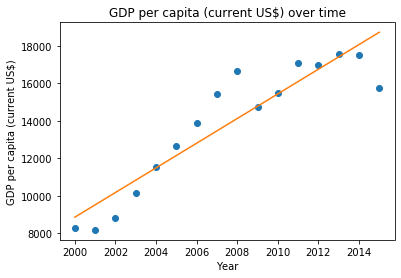

In [30]:
text = "GDP per capita (current US$)"

years = []
GDP_per_capita = []
for index, row in linearData.iterrows():
    years.append(index)
    GDP_per_capita.append(row[0])

plt.plot(years,GDP_per_capita,'o')


years_ = []
for y in years:
    years_.append([y])


clf = linear_model.LinearRegression()
clf.fit(years_,GDP_per_capita)
predicted = clf.predict(years_)

plt.plot(years,predicted)
plt.title("{} over time".format(text))
plt.xlabel("Year")
plt.ylabel("GDP per capita (current US$)")
plt.show()

In the resulting plot, we can clearly see a positive trend from just the scatter plot alone, and the linear model confirms this since it produces a linear line with a positive slope.
Thus, we can confirm that GDP per capita grows over time.

Next, we will find the R^2 value to see how well the linear regression fits our data by using clf.score().

In [31]:
print(clf.score(years_,GDP_per_capita))

0.8481106413800102


Our results show R^2 being 0.848 which means that the linear regression fits the data pretty well as it is closer to 1 which signifies a perfect fit than 0 which means no meaningful fit.

Moving on, we must observe the fact that our scatter plot seems to flatten after 2010, so we must see if a polynomial of 2 degrees fits our data better.

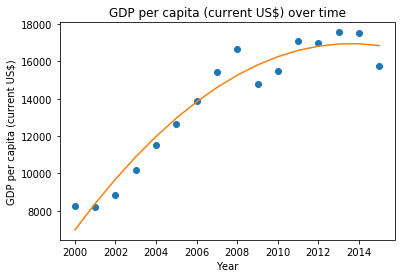

0.9437415420076714


In [50]:
plt.plot(years,GDP_per_capita,'o')

polynomial_Feats = PolynomialFeatures(degree=2)
polynomial_years = polynomial_Feats.fit_transform(years_)
clf.fit(polynomial_years,GDP_per_capita)

polynomial_predict = clf.predict(polynomial_years)
plt.title("{} over time".format(text))
plt.xlabel("Year")
plt.ylabel("GDP per capita (current US$)")
plt.plot(years,polynomial_predict)

plt.show()
print(clf.score(polynomial_years,GDP_per_capita))

Here we have a R^2 value of 0.944 which is much better than our linear fit.

Now we can try a polynomial with 3 degrees.

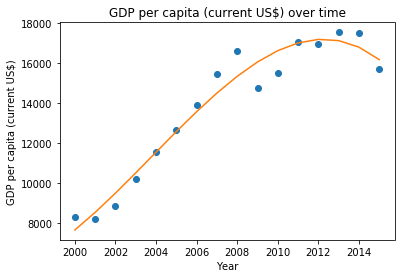

0.9560257134769029


In [51]:
plt.plot(years,GDP_per_capita,'o')

polynomial_Feats = PolynomialFeatures(degree=3)
polynomial_years = polynomial_Feats.fit_transform(years_)
clf.fit(polynomial_years,GDP_per_capita)

polynomial_predict = clf.predict(polynomial_years)
plt.title("{} over time".format(text))
plt.xlabel("Year")
plt.ylabel("GDP per capita (current US$)")
plt.plot(years,polynomial_predict)

plt.show()
print(clf.score(polynomial_years,GDP_per_capita))

Now we have an R^2 value of 0.956 which is slightly better than the last. However, must must take into account that the curve downwards seems to be heavily influenced by one data point on the scatter plot.

Next, we can repeat the process of fitting linear regressions to final consumption expenditure, general government final consumption expenditure, foreign direct investment, exports and imports of goods and services.

In [67]:
def plot_GDP_predictors(x,y,linearData):
    years = []
    GDP_predictor = []
    for index, row in linearData.iterrows():
        years.append(index)
        GDP_predictor.append(row[y])

    plt.plot(years,GDP_predictor,'o')


    years_ = []
    for y in years:
        years_.append([y])

    clf = linear_model.LinearRegression()
    clf.fit(years_,GDP_predictor)
    predicted = clf.predict(years_)
    
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    
    r_squared = clf.score(years_,GDP_predictor)
    plt.plot(years,predicted,label="linear-regression R^2:{}".format(round(r_squared,2)))
    plt.legend()
    plt.show()
    
    plt.plot(years,GDP_predictor,'o')

    polynomial_Feats = PolynomialFeatures(degree=2)
    polynomial_years = polynomial_Feats.fit_transform(years_)
    clf.fit(polynomial_years,GDP_predictor)

    polynomial_predict = clf.predict(polynomial_years)
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    plt.plot(years,polynomial_predict)

    plt.show()
    print(clf.score(polynomial_years,GDP_predictor))
    
    polynomial_Feats = PolynomialFeatures(degree=3)
    polynomial_years = polynomial_Feats.fit_transform(years_)
    clf.fit(polynomial_years,GDP_predictor)

    polynomial_predict = clf.predict(polynomial_years)
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    plt.plot(years,polynomial_predict)

    plt.show()
    print(clf.score(polynomial_years,GDP_predictor))

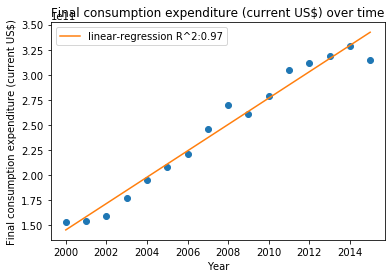

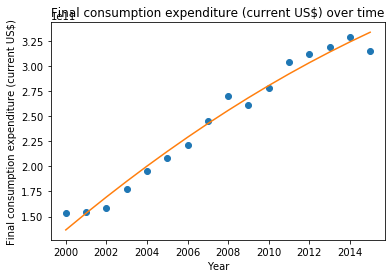

0.9756333475823485


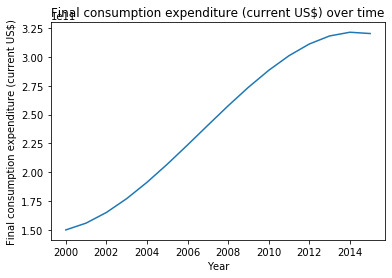

0.9901472894559978


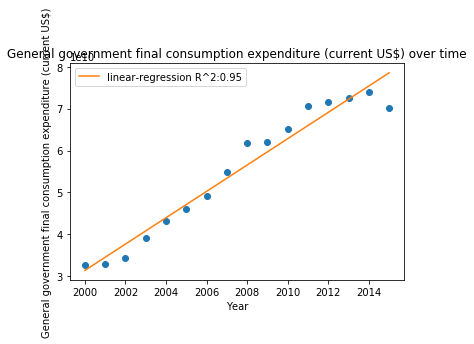

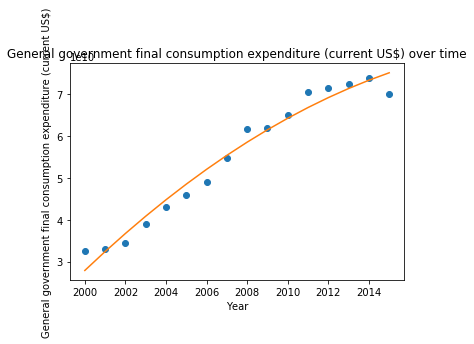

0.9698707926452302


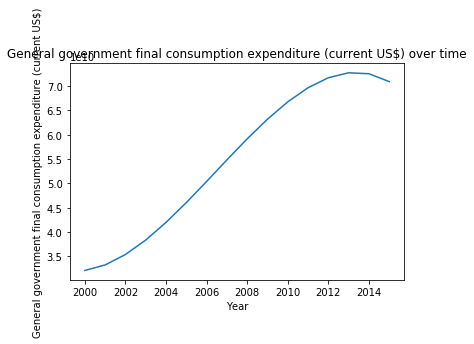

0.9945338591617091


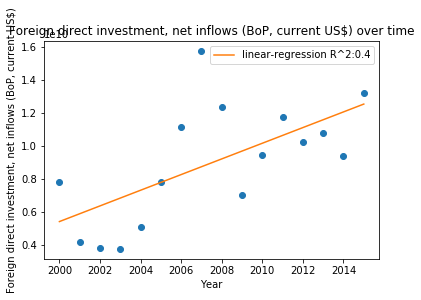

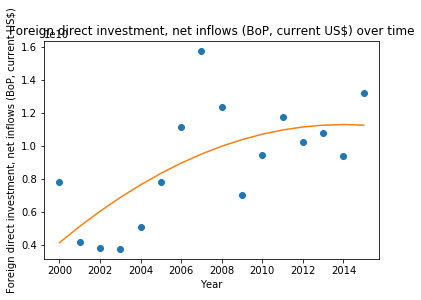

0.4399749833373702


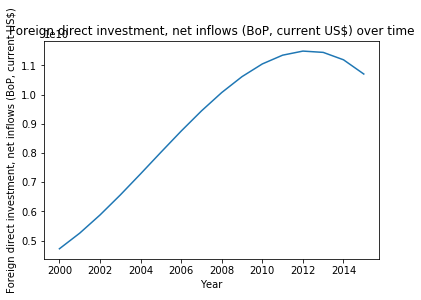

0.4481278754534001


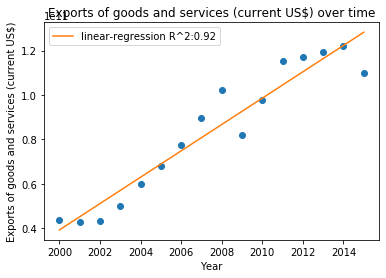

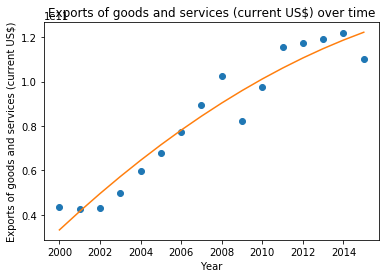

0.9289064425890834


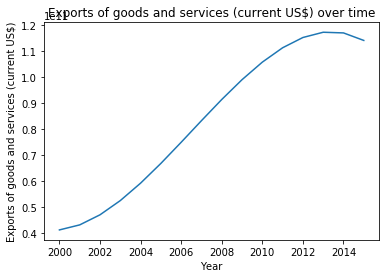

0.9528024570920761


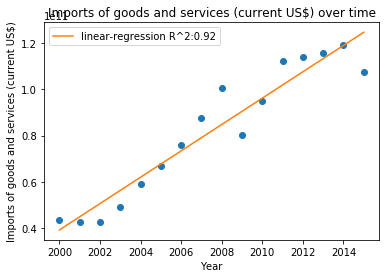

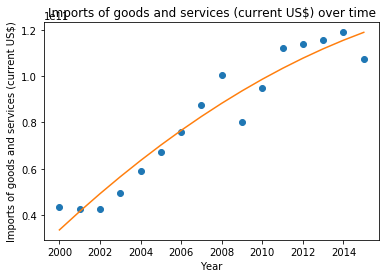

0.9279640329103218


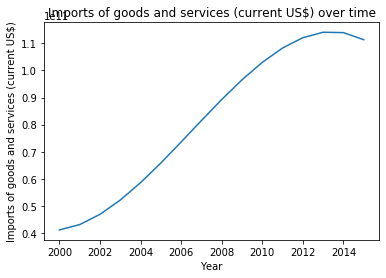

0.9507969423864838


In [68]:
plot_GDP_predictors("Final consumption expenditure (current US$)",1,linearData)
plot_GDP_predictors("General government final consumption expenditure (current US$)",2,linearData)
plot_GDP_predictors("Foreign direct investment, net inflows (BoP, current US$)",3,linearData)
plot_GDP_predictors("Exports of goods and services (current US$)",4,linearData)
plot_GDP_predictors("Imports of goods and services (current US$)",5,linearData)

Our results show that final consumption expenditure, general government final consumption expenditure, foreign direct investment net inflows, exports and imports of goods and services all trend upwards, but it is important to note that the R^2 value for foreign direct investment, net inflows is sub 0.5

Next, we can repeat the same process for linear regression with our data from miscelleaneousData.

In [63]:
linearmiscData = miscellaneousData.copy()

linearmiscData = linearmiscData.drop(columns=['Country Name'])
linearmiscData = linearmiscData.groupby(['Year']).mean()

linearmiscData

,GDP per capita (current US$),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Current health expenditure (% of GDP),"Fertility rate, total (births per woman)","Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)"
Year,,,,,,,,,
2000,7674.059169,33.266764,19.793678,46.939581,5.669040,3.236639,4.331777,15.608488,86.229305
2001,7601.921824,32.926700,19.719297,47.354022,5.794969,3.179547,4.583330,15.163513,87.836950
2002,8187.985866,32.584507,19.628847,47.786637,5.849889,3.128455,4.607709,14.801800,88.548263
2003,9406.302141,32.208138,19.612557,48.179314,5.982862,3.098433,4.614258,14.414298,88.443202
2004,10662.460932,31.692356,19.725695,48.581966,6.049743,3.074591,4.283678,14.001038,89.189588
2005,11680.119174,31.291222,19.779725,48.929095,6.078361,3.043457,4.455298,13.548731,89.657071
2006,12821.145539,30.756350,19.936304,49.307399,6.068830,3.010137,4.372100,13.016966,89.568532
2007,14274.433976,30.206053,20.119412,49.674539,6.069712,2.984493,4.405553,12.612164,90.196741
2008,15415.637317,29.806488,20.141725,50.051844,6.071279,2.962120,4.496413,12.255640,90.401707


In [74]:
def plot_GDP_misc(x,y,linearmiscData):
    years = []
    GDP_predictor = []
    for index, row in linearmiscData.iterrows():
        years.append(index)
        GDP_predictor.append(row[y])

    plt.plot(years,GDP_predictor,'o')


    years_ = []
    for y in years:
        years_.append([y])

    clf = linear_model.LinearRegression()
    clf.fit(years_,GDP_predictor)
    predicted = clf.predict(years_)
    
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    
    r_squared = clf.score(years_,GDP_predictor)
    plt.plot(years,predicted,label="linear-regression R^2:{}".format(round(r_squared,2)))
    plt.legend()
    plt.show()
    
    plt.plot(years,GDP_predictor,'o')

    polynomial_Feats = PolynomialFeatures(degree=2)
    polynomial_years = polynomial_Feats.fit_transform(years_)
    clf.fit(polynomial_years,GDP_predictor)

    polynomial_predict = clf.predict(polynomial_years)
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    plt.plot(years,polynomial_predict)

    plt.show()
    print(clf.score(polynomial_years,GDP_predictor))
    
    polynomial_Feats = PolynomialFeatures(degree=3)
    polynomial_years = polynomial_Feats.fit_transform(years_)
    clf.fit(polynomial_years,GDP_predictor)

    polynomial_predict = clf.predict(polynomial_years)
    plt.title("{} over time".format(x))
    plt.xlabel("Year")
    plt.ylabel(x)
    plt.plot(years,polynomial_predict)

    plt.show()
    print(clf.score(polynomial_years,GDP_predictor))

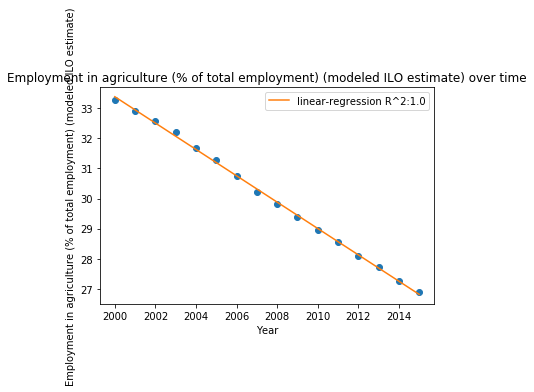

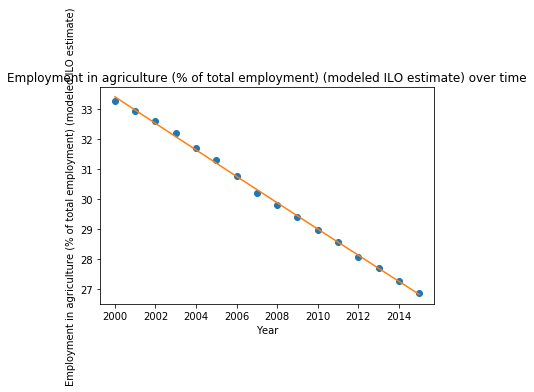

0.9987835752393046


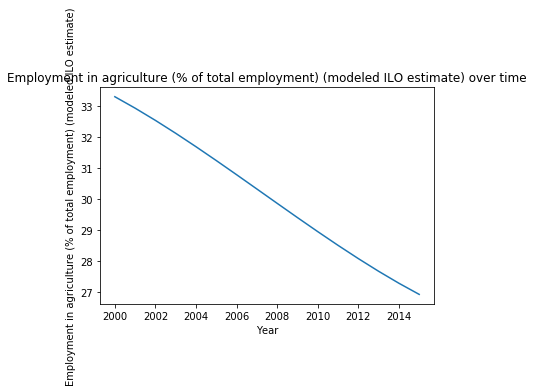

0.9994047894666219


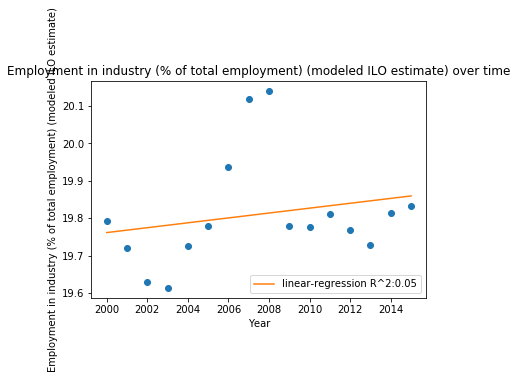

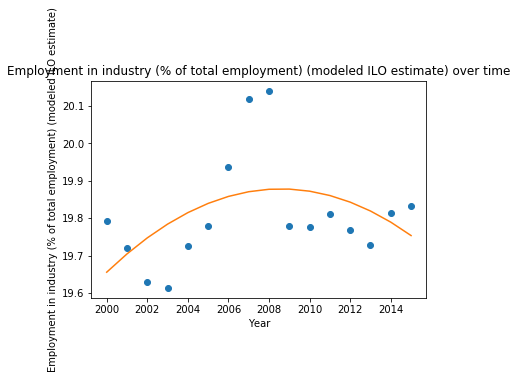

0.2084906604232991


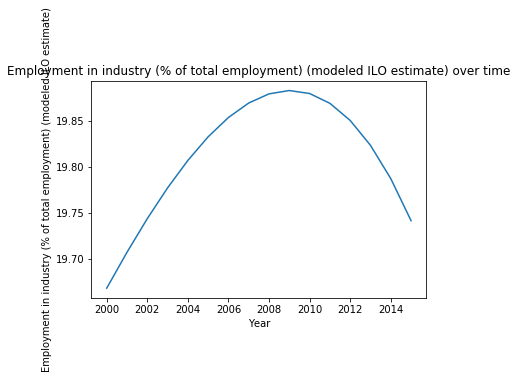

0.2108347351276589


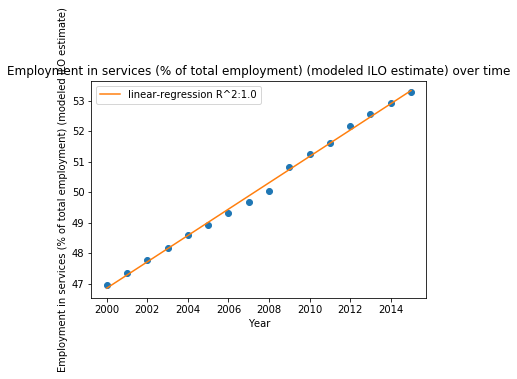

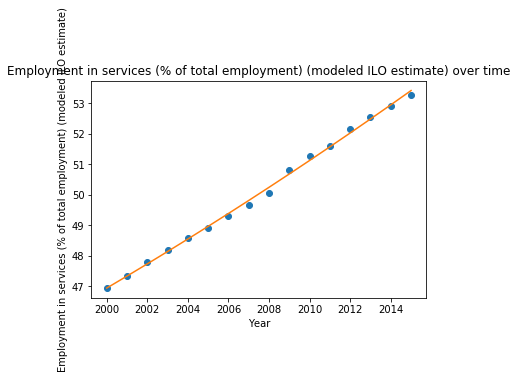

0.9976542268530653


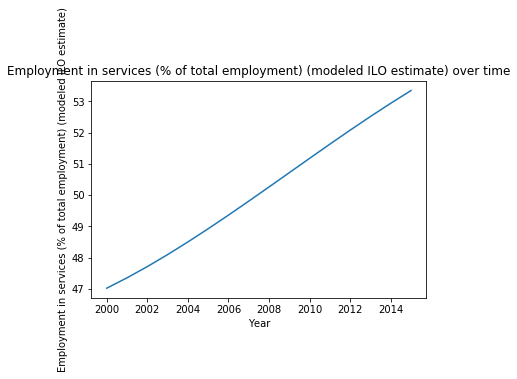

0.9981311430679118


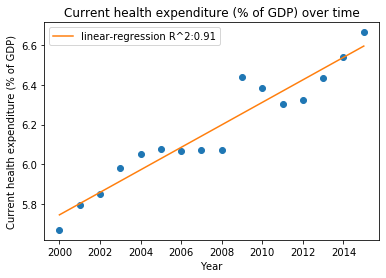

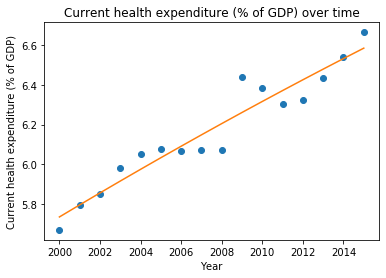

0.915137645330299


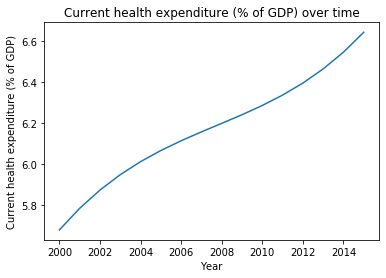

0.9275785732289996


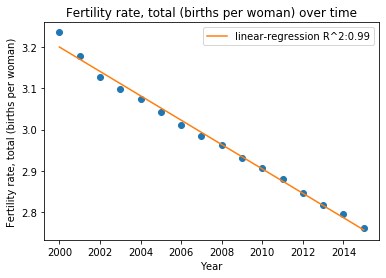

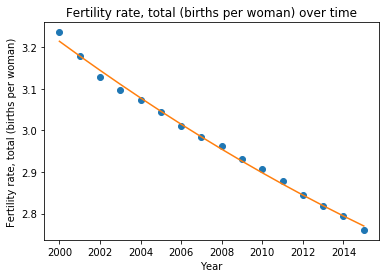

0.9957409110934995


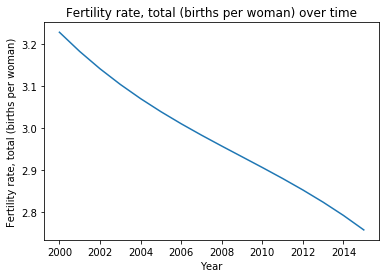

0.9985018304570081


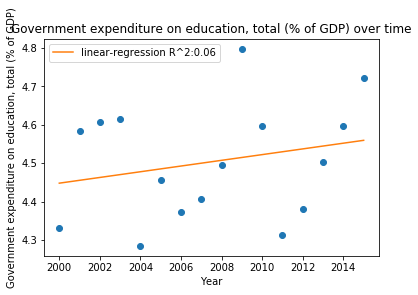

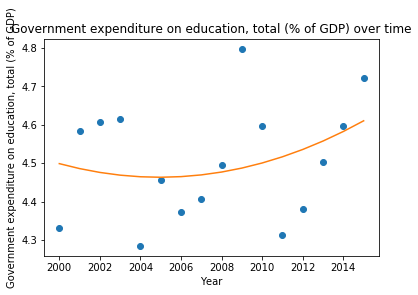

0.09087046221994255


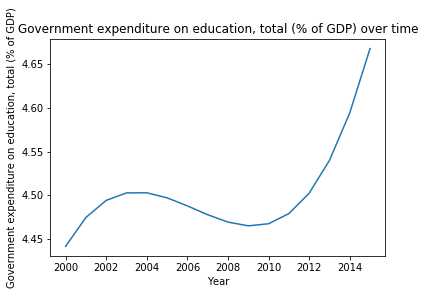

0.13815744124726492


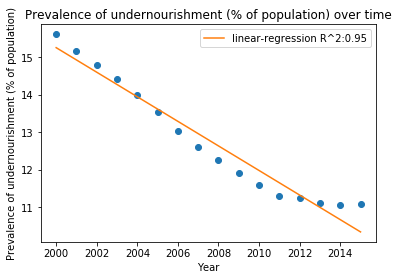

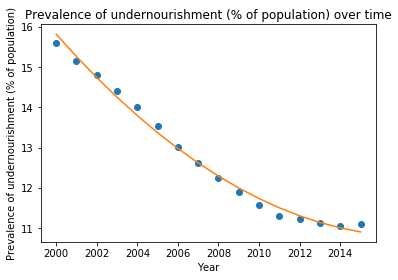

0.9927340070601925


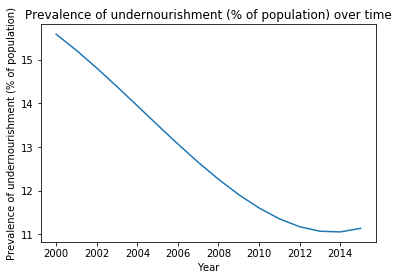

0.9993474157772979


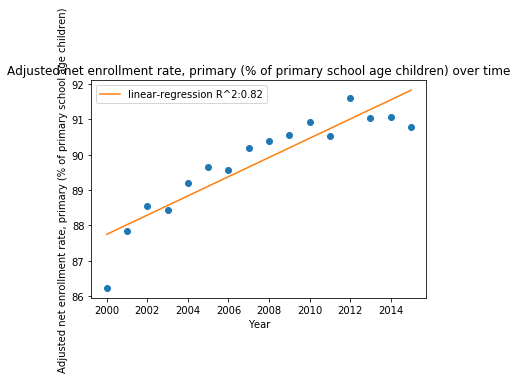

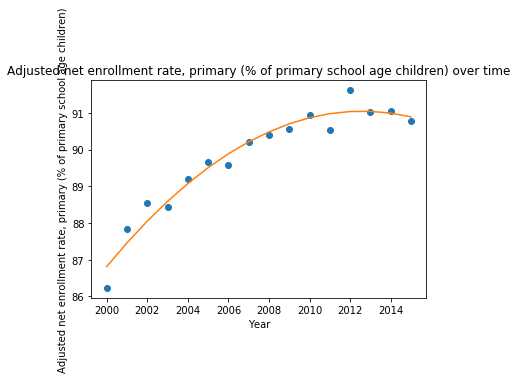

0.9518391500785182


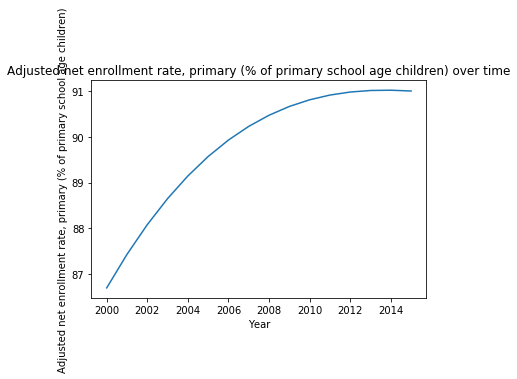

0.9536391551903989


In [79]:
plot_GDP_predictors("Employment in agriculture (% of total employment) (modeled ILO estimate)",1,linearmiscData)
plot_GDP_predictors("Employment in industry (% of total employment) (modeled ILO estimate)",2,linearmiscData)
plot_GDP_predictors("Employment in services (% of total employment) (modeled ILO estimate)",3,linearmiscData)
plot_GDP_predictors("Current health expenditure (% of GDP)",4,linearmiscData)
plot_GDP_predictors("Fertility rate, total (births per woman)",5,linearmiscData)
plot_GDP_predictors("Government expenditure on education, total (% of GDP)",6,linearmiscData)
plot_GDP_predictors("Prevalence of undernourishment (% of population)",7,linearmiscData)
plot_GDP_predictors("Adjusted net enrollment rate, primary (% of primary school age children)",8,linearmiscData)

Results here show that employment in agriculture trends downwards over time, employment in industry over time cannot be conclusive, employment in services trends upwards over time, current health expenditure trends upwards over time, fertility rate trends downwards over time, government expenditure in education over time is not conclusive, prevalence of undernourishment trends downwards over time, and adjusted net enrollment rate trends upwards over time.

## <center>Insight and Policy Decision<center>

## Conclusion